# Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Data Loading

In [2]:
# Load the Spotify dataset
spotify_data = pd.read_csv("spotify_dataset.csv")


In [4]:
spotify_data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


# Data Exploration

In [5]:
# Data Exploration
# Understanding the Structure and Size of the Dataset
print("Dataset Shape:", spotify_data.shape)
print("\nDataset Columns:", spotify_data.columns)
print("\nDataset Info:")
print(spotify_data.info())
print("\nFirst Few Rows of the Dataset:")
print(spotify_data.head())


Dataset Shape: (20594, 24)

Dataset Columns: Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'EnergyLiveness', 'most_playedon'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64

# Artist Analysis

In [6]:
# Artist Analysis
# Identifying Top Artists Based on Popularity and Number of Songs
top_artists = spotify_data['Artist'].value_counts().head(10)
print("\nTop 10 Artists based on Number of Songs:")
print(top_artists)



Top 10 Artists based on Number of Songs:
Gorillaz              10
Thaman S              10
Alan Gomez            10
RÜFÜS DU SOL          10
Bo Burnham            10
Lin-Manuel Miranda    10
Kontra K              10
Elevation Worship     10
Amit Trivedi          10
Mustard               10
Name: Artist, dtype: int64


# Song Duration Analysis

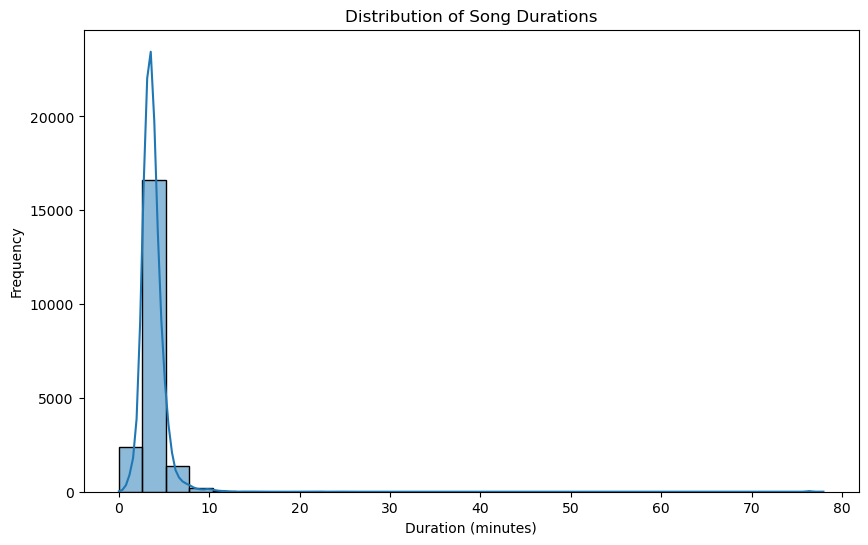

In [7]:
# Song Duration Analysis
# Distribution of Song Durations
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Duration_min'], bins=30, kde=True)
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


# Data Preprocessing

In [8]:
# Data Preprocessing
# Clean and preprocess the data

# Handling Missing Values
spotify_data.dropna(inplace=True)

# Feature Engineering
# Encode categorical variables
spotify_data = pd.get_dummies(spotify_data, columns=['Licensed', 'official_video'])

# Split data into features and target
X = spotify_data.drop(['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'most_playedon'], axis=1)
y = spotify_data['most_playedon']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelling

In [9]:
# Model Development
# Develop machine learning models for behavior analysis and prediction
# Using Random Forest Classifier as an example
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation

In [10]:
# Evaluation
print("\nRandom Forest Classifier Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Classifier Evaluation:
Accuracy Score: 0.9718378247147366

Classification Report:
              precision    recall  f1-score   support

     Spotify       0.97      0.99      0.98      3110
     Youtube       0.98      0.90      0.94      1009

    accuracy                           0.97      4119
   macro avg       0.97      0.95      0.96      4119
weighted avg       0.97      0.97      0.97      4119


Confusion Matrix:
[[3091   19]
 [  97  912]]


# Recommendation System

C:\Users\RAHULSRI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


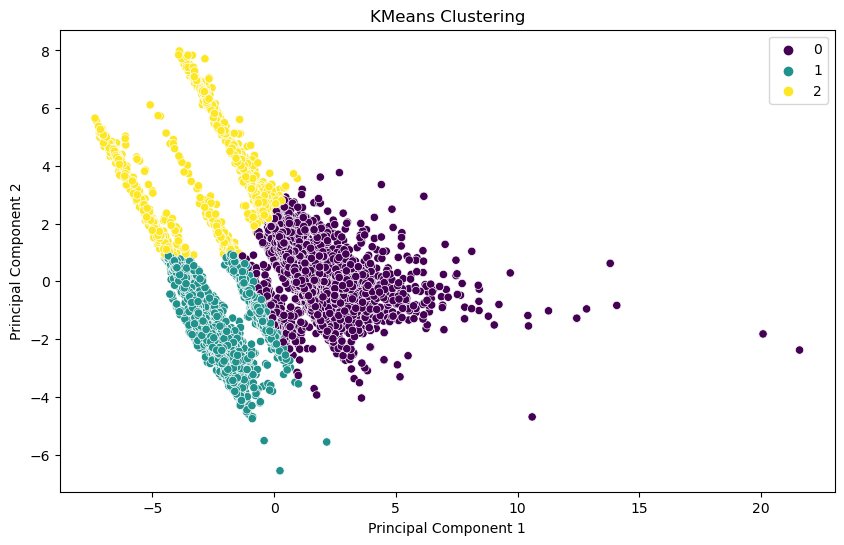

In [11]:
# Real-time Recommendation Engine Implementation
# Implement algorithms for real-time recommendations based on user interactions

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
